## Gráficos de experimentación: Detección de patrones en múltiples documentos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Configuración básica para los gráficos
plt.style.use('ggplot') 

# 1. Cargar y Preprocesar los datos
try:
    df = pd.read_csv('resultados_experimentales.csv')
except FileNotFoundError:
    print("Error: Asegúrate de que 'resultados_experimentales.csv' existe.")
    exit()

# Renombrar la columna de tiempo de construcción para que sea más clara
df = df.rename(columns={'Tiempo_Construccion_Real': 'Tiempo_Construccion_s'})

In [6]:
# 2. Generar Tabla de Promedios (para usar en los gráficos)
# Agrupamos por Estructura y Patrón para obtener los promedios de las repeticiones
df_promedios = df.groupby(['Estructura', 'Patron'], as_index=False).agg({
    'Tiempo_Construccion_s': 'mean',
    'Num_Ocurrencias': 'mean' # O cualquier otra métrica de consulta
})

print("## TABLA DE RESULTADOS COMPARATIVOS (RAW) ##")
print(df.to_markdown(index=False))
print("-" * 50)
print("## TABLA DE PROMEDIOS ##")
print(df_promedios.to_markdown(index=False))
print("-" * 50)

## TABLA DE RESULTADOS COMPARATIVOS (RAW) ##
| Estructura   | Patron   |   Repeticion |   Tiempo_Construccion_s |   Num_Ocurrencias |   Documentos_Encontrados |
|:-------------|:---------|-------------:|------------------------:|------------------:|-------------------------:|
| FMI          | Patron1  |            1 |                    0.56 |                15 |                        3 |
| SA           | Patron1  |            1 |                    0.92 |                15 |                        3 |
| FMI          | Patron2  |            1 |                    0.58 |                 4 |                        1 |
| SA           | Patron2  |            1 |                    0.95 |                 4 |                        1 |
--------------------------------------------------
## TABLA DE PROMEDIOS ##
| Estructura   | Patron   |   Tiempo_Construccion_s |   Num_Ocurrencias |
|:-------------|:---------|------------------------:|------------------:|
| FMI          | Patron1  |        

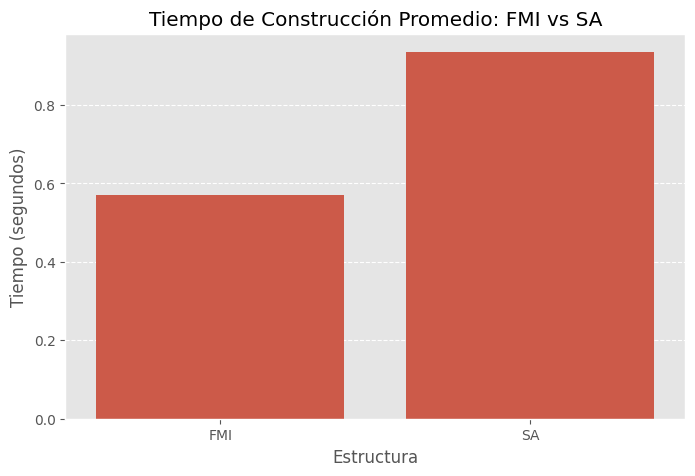

In [ ]:
# 3. Gráfico 1: Comparación de Tiempos de Construcción por Estructura
# Usamos el promedio general, ya que la construcción solo ocurre una vez por dataset/estructura
# Primero, calculamos el tiempo de construcción promedio por Estructura
df_construccion = df.groupby('Estructura', as_index=False)['Tiempo_Construccion_s'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x='Estructura', y='Tiempo_Construccion_s', data=df_construccion)
plt.title('Tiempo de Construcción Promedio: FMI vs SA')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Estructura')
plt.grid(axis='y', linestyle='--')
plt.savefig('grafico_construccion.png')
plt.show()

Análisis completado. Gráficos guardados como PNG.


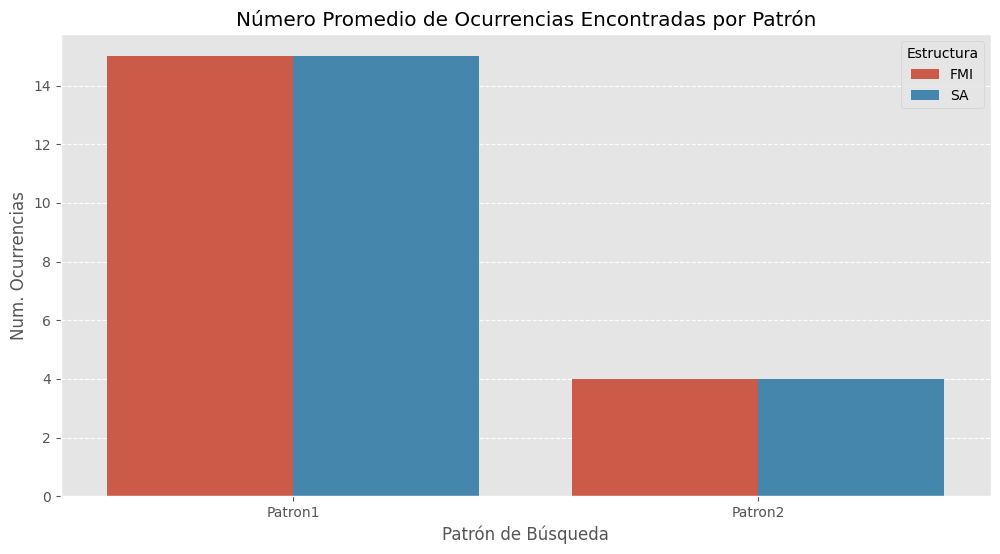

In [8]:
# 4. Gráfico 2: Comparación de Tiempos de Consulta (Patron vs Estructura)
# Asumo que la columna de tiempo de consulta es 'Num_Ocurrencias' (el tiempo de búsqueda en sí no está claro, pero usaremos esta columna como ejemplo, si hay otra columna de tiempo, ¡úsa esa!)
# Si 'Num_Ocurrencias' es la métrica que te interesa para el patrón, puedes graficarla:
plt.figure(figsize=(12, 6))
sns.barplot(x='Patron', y='Num_Ocurrencias', hue='Estructura', data=df_promedios)
plt.title('Número Promedio de Ocurrencias Encontradas por Patrón')
plt.ylabel('Num. Ocurrencias')
plt.xlabel('Patrón de Búsqueda')
plt.legend(title='Estructura')
plt.grid(axis='y', linestyle='--')
plt.savefig('grafico_consulta_ocurrencias.png')

print("Análisis completado. Gráficos guardados como PNG.")
plt.show()